<a href="https://colab.research.google.com/github/rayanqamarsyed/AIlab/blob/main/Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Artificial Intelligence
assignment 02

Submitted by:
Syed Abiha Noor
SP22-BSE-128

Rayan Qamar Syed
SP22-BSE-142

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

def load_and_explore_data():
    """
    Load the SWAT dataset from Excel file
    """
    try:
        print("Loading Excel file...")
        df = pd.read_excel('/content/drive/MyDrive/Dec2019.xlsx')
        print("Successfully loaded the Excel file")

        # Display initial information about the data
        print("\nDataset Overview:")
        print("-----------------")
        print(f"Shape of dataset: {df.shape}")
        print("\nFirst few rows:")
        print(df.head())
        print("\nData Info:")
        print(df.info())
        print("\nColumn Data Types:")
        print(df.dtypes)
        print("\nMissing values:")
        print(df.isnull().sum())

        return df

    except Exception as e:
        print(f"Error loading file: {str(e)}")
        print("If using .xlsx format, try installing openpyxl: !pip install openpyxl")
        return None

def preprocess_data(df):
    """
    Preprocess the loaded dataset with proper datetime handling
    """
    if df is None:
        print("Error: No data to preprocess")
        return None, None, None, None, None

    # Create a copy of the dataframe
    df_processed = df.copy()

    # Handle datetime columns
    datetime_columns = df_processed.select_dtypes(include=['datetime64']).columns
    for column in datetime_columns:
        # Convert datetime to numerical features
        df_processed[f'{column}_year'] = df_processed[column].dt.year
        df_processed[f'{column}_month'] = df_processed[column].dt.month
        df_processed[f'{column}_day'] = df_processed[column].dt.day
        df_processed[f'{column}_hour'] = df_processed[column].dt.hour
        # Drop the original datetime column
        df_processed.drop(column, axis=1, inplace=True)

    # Handle missing values
    for column in df_processed.columns:
        if df_processed[column].isnull().sum() > 0:
            if df_processed[column].dtype in ['float64', 'int64']:
                df_processed[column].fillna(df_processed[column].mean(), inplace=True)
            else:
                df_processed[column].fillna(df_processed[column].mode()[0], inplace=True)

    # Encode categorical variables (excluding datetime-derived columns)
    le = LabelEncoder()
    categorical_columns = df_processed.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df_processed[column] = le.fit_transform(df_processed[column].astype(str))

    # Scale numerical features
    scaler = StandardScaler()
    numerical_columns = df_processed.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_columns) > 0:
        df_processed[numerical_columns] = scaler.fit_transform(df_processed[numerical_columns])

    # Print the processed data info
    print("\nProcessed Data Info:")
    print(df_processed.info())

    # Identify target column (you may need to modify this based on your dataset)
    print("\nAvailable columns for target selection:")
    for i, col in enumerate(df_processed.columns):
        print(f"{i}: {col}")

    # Ask for target column index
    target_idx = int(input("\nEnter the index number of your target column: "))
    target_column = df_processed.columns[target_idx]

    # Split features and target
    X = df_processed.drop(target_column, axis=1)
    y = df_processed[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, scaler

# Main execution
if __name__ == "__main__":
    # First, install required packages if not already installed
    print("Installing required packages...")
    !pip install openpyxl

    # Load and explore data
    df = load_and_explore_data()

    if df is not None:
        # Preprocess data
        X_train, X_test, y_train, y_test, scaler = preprocess_data(df)

        if X_train is not None:
            print("\nPreprocessed Data Shapes:")
            print(f"X_train shape: {X_train.shape}")
            print(f"X_test shape: {X_test.shape}")
            print(f"y_train shape: {y_train.shape}")
            print(f"y_test shape: {y_test.shape}")

Installing required packages...
Loading Excel file...
Successfully loaded the Excel file

Dataset Overview:
-----------------
Shape of dataset: (13210, 82)

First few rows:
                                               Notes Unnamed: 1 Unnamed: 2  \
0                                Initial Plant State        NaN        NaN   
1  P1_State: 3 (MV101 and P101/102 control sequence)        NaN        NaN   
2  P2_State: 2 (MV201 and Dosing Pumps P201/202/2...        NaN        NaN   
3               P3_State: 7 (UF Filtration sequence)        NaN        NaN   
4  P4_State: 4 (Dosing pumps P401/402 control seq...        NaN        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  

<ipython-input-10-e64a0e41a7e1>:66: UserWarning: Unable to sort modes: '<' not supported between instances of 'datetime.datetime' and 'str'
  df_processed[column].fillna(df_processed[column].mode()[0], inplace=True)
<ipython-input-10-e64a0e41a7e1>:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[column].fillna(df_processed[column].mode()[0], inplace=True)



Processed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13210 entries, 0 to 13209
Data columns (total 82 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Notes        13210 non-null  float64
 1   Unnamed: 1   13210 non-null  float64
 2   Unnamed: 2   13210 non-null  float64
 3   Unnamed: 3   13210 non-null  float64
 4   Unnamed: 4   13210 non-null  float64
 5   Unnamed: 5   13210 non-null  float64
 6   Unnamed: 6   13210 non-null  float64
 7   Unnamed: 7   13210 non-null  float64
 8   Unnamed: 8   13210 non-null  float64
 9   Unnamed: 9   13210 non-null  float64
 10  Unnamed: 10  13210 non-null  float64
 11  Unnamed: 11  13210 non-null  float64
 12  Unnamed: 12  13210 non-null  float64
 13  Unnamed: 13  13210 non-null  float64
 14  Unnamed: 14  13210 non-null  float64
 15  Unnamed: 15  13210 non-null  float64
 16  Unnamed: 16  13210 non-null  float64
 17  Unnamed: 17  13210 non-null  float64
 18  Unnamed: 18  13210 non-n


KNN Regression Model Performance Metrics:
Mean Squared Error (MSE): 0.0288
Root Mean Squared Error (RMSE): 0.1696
Mean Absolute Error (MAE): 0.0423
R-squared Score: 0.9715


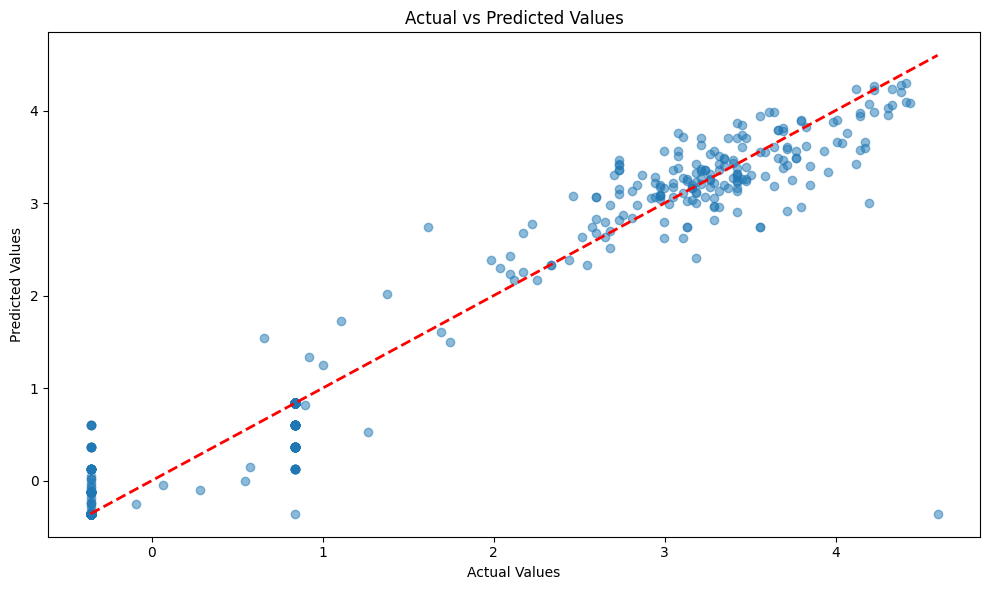

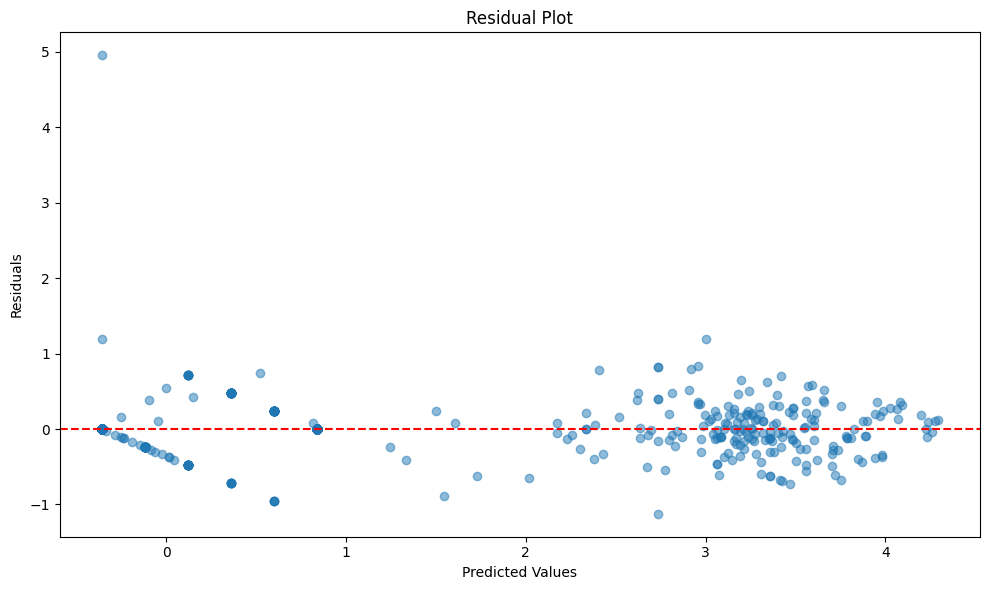

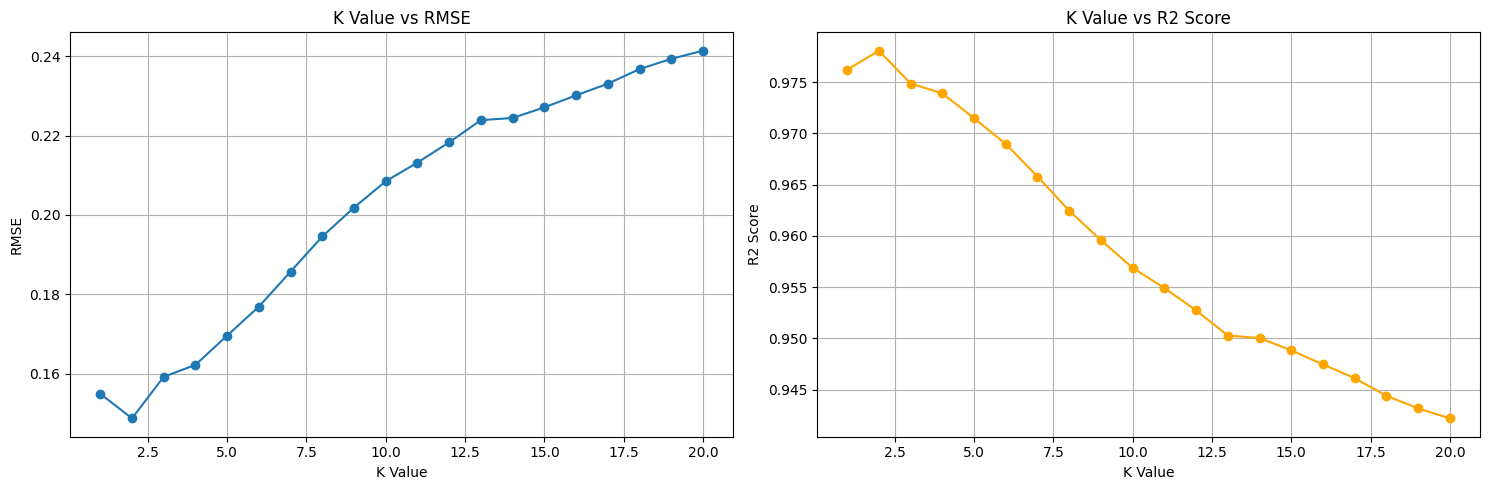


Optimal k value (based on RMSE): 2

Optimized KNN Model Performance:
RMSE: 0.1487
R2 Score: 0.9781


In [12]:
# Import necessary libraries
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

def train_knn_model(X_train, X_test, y_train, y_test):
    # Initialize KNN regressor
    knn = KNeighborsRegressor(n_neighbors=5)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("\nKNN Regression Model Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared Score: {r2:.4f}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.tight_layout()
    plt.show()

    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residual Plot')
    plt.tight_layout()
    plt.show()

    return knn, y_pred

def optimize_knn(X_train, X_test, y_train, y_test):
    # Try different values of k
    k_values = range(1, 21)
    rmse_scores = []
    r2_scores = []

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    # Plot k values vs RMSE and R2
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # RMSE plot
    ax1.plot(k_values, rmse_scores, marker='o')
    ax1.set_title('K Value vs RMSE')
    ax1.set_xlabel('K Value')
    ax1.set_ylabel('RMSE')
    ax1.grid(True)

    # R2 plot
    ax2.plot(k_values, r2_scores, marker='o', color='orange')
    ax2.set_title('K Value vs R2 Score')
    ax2.set_xlabel('K Value')
    ax2.set_ylabel('R2 Score')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Find optimal k based on RMSE
    optimal_k = k_values[np.argmin(rmse_scores)]
    print(f"\nOptimal k value (based on RMSE): {optimal_k}")

    # Train model with optimal k
    optimal_knn = KNeighborsRegressor(n_neighbors=optimal_k)
    optimal_knn.fit(X_train, y_train)

    return optimal_knn

# Main execution
if __name__ == "__main__":
    # Assuming X_train, X_test, y_train, y_test are already loaded

    # Train initial KNN model
    knn_model, y_pred = train_knn_model(X_train, X_test, y_train, y_test)

    # Optimize KNN model
    optimal_knn = optimize_knn(X_train, X_test, y_train, y_test)

    # Make predictions with optimal model
    optimal_predictions = optimal_knn.predict(X_test)

    # Print final optimized model performance
    print("\nOptimized KNN Model Performance:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, optimal_predictions)):.4f}")
    print(f"R2 Score: {r2_score(y_test, optimal_predictions):.4f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5175 - mae: 0.4152 - val_loss: 0.1133 - val_mae: 0.2118
Epoch 2/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1441 - mae: 0.2233 - val_loss: 0.0957 - val_mae: 0.1673
Epoch 3/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1282 - mae: 0.2059 - val_loss: 0.0786 - val_mae: 0.1669
Epoch 4/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0991 - mae: 0.1821 - val_loss: 0.0655 - val_mae: 0.1385
Epoch 5/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0913 - mae: 0.1664 - val_loss: 0.0549 - val_mae: 0.1131
Epoch 6/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0802 - mae: 0.1437 - val_loss: 0.0506 - val_mae: 0.1131
Epoch 7/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0733 - mae: 0.1348 - val_loss: 0.0710 - val_mae: 0.1203
Epoch 8/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0733 - mae: 0.1257 - val_loss: 0.0626 - val_mae: 0.0948
Epoch 9/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss:

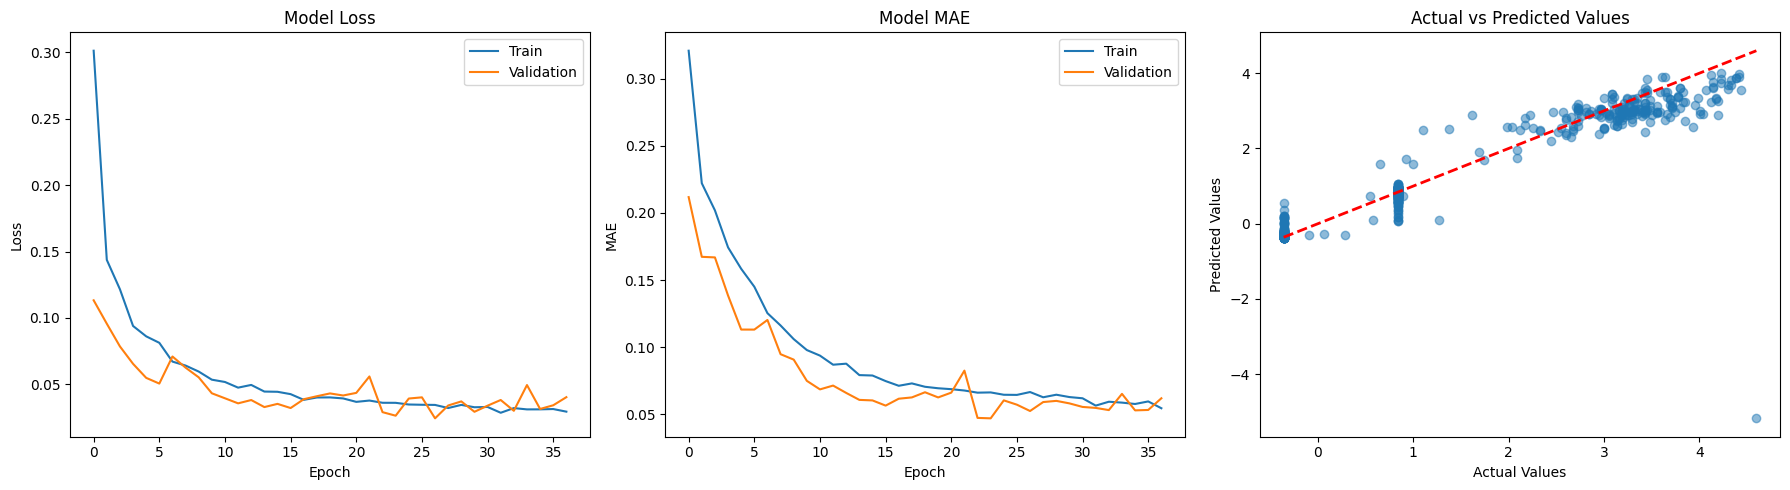

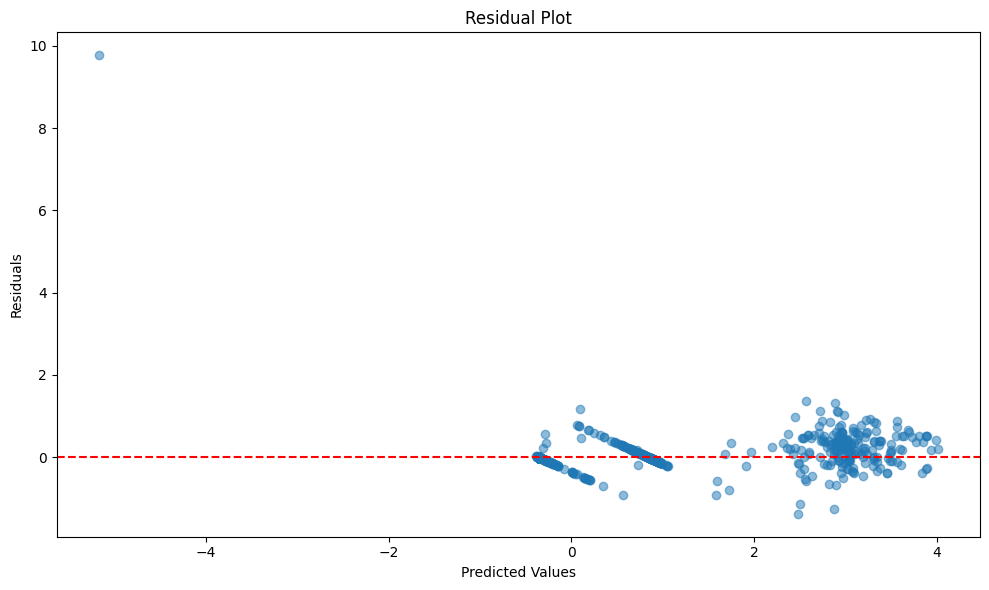

In [13]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def create_regression_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Single output node for regression
    ])

    model.compile(optimizer='adam',
                 loss='mse',  # Mean squared error loss for regression
                 metrics=['mae'])  # Mean absolute error metric

    return model

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Make predictions
    y_pred = model.predict(X_test).flatten()

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("\nNeural Network Regression Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared Score: {r2:.4f}")

    return history, y_pred

def plot_training_history(history, y_test, y_pred):
    # Plot training history
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Plot loss
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(['Train', 'Validation'])

    # Plot MAE
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MAE')
    ax2.legend(['Train', 'Validation'])

    # Plot actual vs predicted
    ax3.scatter(y_test, y_pred, alpha=0.5)
    ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax3.set_xlabel('Actual Values')
    ax3.set_ylabel('Predicted Values')
    ax3.set_title('Actual vs Predicted Values')

    plt.tight_layout()
    plt.show()

    # Plot residuals
    plt.figure(figsize=(10, 6))
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residual Plot')
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Assuming X_train, X_test, y_train, y_test are already loaded

    # Get input shape
    input_shape = (X_train.shape[1],)

    # Create and train model
    model = create_regression_model(input_shape)
    history, y_pred = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)

    # Plot training history and results
    plot_training_history(history, y_test, y_pred)

Loading Excel file...
Successfully loaded the Excel file


<ipython-input-17-b4ac9b0acb40>:40: UserWarning: Unable to sort modes: '<' not supported between instances of 'datetime.datetime' and 'str'
  df_processed[column].fillna(df_processed[column].mode()[0], inplace=True)
<ipython-input-17-b4ac9b0acb40>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[column].fillna(df_processed[column].mode()[0], inplace=True)



Available columns:
0: Notes
1: Unnamed: 1
2: Unnamed: 2
3: Unnamed: 3
4: Unnamed: 4
5: Unnamed: 5
6: Unnamed: 6
7: Unnamed: 7
8: Unnamed: 8
9: Unnamed: 9
10: Unnamed: 10
11: Unnamed: 11
12: Unnamed: 12
13: Unnamed: 13
14: Unnamed: 14
15: Unnamed: 15
16: Unnamed: 16
17: Unnamed: 17
18: Unnamed: 18
19: Unnamed: 19
20: Unnamed: 20
21: Unnamed: 21
22: Unnamed: 22
23: Unnamed: 23
24: Unnamed: 24
25: Unnamed: 25
26: Unnamed: 26
27: Unnamed: 27
28: Unnamed: 28
29: Unnamed: 29
30: Unnamed: 30
31: Unnamed: 31
32: Unnamed: 32
33: Unnamed: 33
34: Unnamed: 34
35: Unnamed: 35
36: Unnamed: 36
37: Unnamed: 37
38: Unnamed: 38
39: Unnamed: 39
40: Unnamed: 40
41: Unnamed: 41
42: Unnamed: 42
43: Unnamed: 43
44: Unnamed: 44
45: Unnamed: 45
46: Unnamed: 46
47: Unnamed: 47
48: Unnamed: 48
49: Unnamed: 49
50: Unnamed: 50
51: Unnamed: 51
52: Unnamed: 52
53: Unnamed: 53
54: Unnamed: 54
55: Unnamed: 55
56: Unnamed: 56
57: Unnamed: 57
58: Unnamed: 58
59: Unnamed: 59
60: Unnamed: 60
61: Unnamed: 61
62: Unnamed: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7667237.5000 - mae: 2452.3149 - val_loss: 523277.5625 - val_mae: 568.2435
Epoch 2/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 546757.3125 - mae: 590.3787 - val_loss: 326666.9062 - val_mae: 433.7368
Epoch 3/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 433268.5938 - mae: 518.5354 - val_loss: 277177.3750 - val_mae: 401.0085
Epoch 4/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 371652.4375 - mae: 481.1711 - val_loss: 247748.6562 - val_mae: 378.0536
Epoch 5/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 353185.0938 - mae: 466.8046 - val_loss: 227731.3594 - val_mae: 362.0009
Epoch 6/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 338869.4062 - mae: 457.0889 - val_loss: 231388.7500 - val_mae: 378.2424
Epoch 7/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 334028.1562 - mae: 456.7433 - val_loss: 200476.0625 - val_mae: 337.3170
Epoch 8/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 302072.6562 - mae:

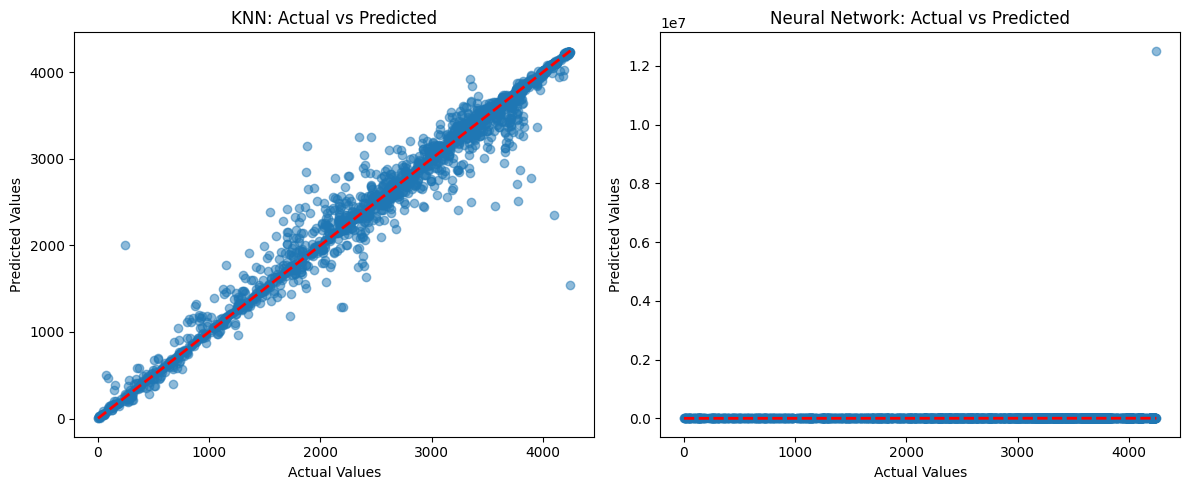

In [17]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess data
def prepare_data():
    try:
        print("Loading Excel file...")
        df = pd.read_excel('/content/drive/MyDrive/Dec2019.xlsx')
        print("Successfully loaded the Excel file")

        # Create a copy of the dataframe
        df_processed = df.copy()

        # Handle datetime columns
        datetime_columns = df_processed.select_dtypes(include=['datetime64']).columns
        for column in datetime_columns:
            df_processed[f'{column}_year'] = df_processed[column].dt.year
            df_processed[f'{column}_month'] = df_processed[column].dt.month
            df_processed[f'{column}_day'] = df_processed[column].dt.day
            df_processed[f'{column}_hour'] = df_processed[column].dt.hour
            df_processed.drop(column, axis=1, inplace=True)

        # Handle missing values
        for column in df_processed.columns:
            if df_processed[column].isnull().sum() > 0:
                if df_processed[column].dtype in ['float64', 'int64']:
                    df_processed[column].fillna(df_processed[column].mean(), inplace=True)
                else:
                    df_processed[column].fillna(df_processed[column].mode()[0], inplace=True)

        # Encode categorical variables
        le = LabelEncoder()
        categorical_columns = df_processed.select_dtypes(include=['object']).columns
        for column in categorical_columns:
            df_processed[column] = le.fit_transform(df_processed[column].astype(str))

        # Print column information
        print("\nAvailable columns:")
        for i, col in enumerate(df_processed.columns):
            print(f"{i}: {col}")

        # Get target column from user
        target_idx = int(input("\nEnter the index number of your target column: "))
        target_column = df_processed.columns[target_idx]

        # Split features and target
        X = df_processed.drop(target_column, axis=1)
        y = df_processed[target_column]

        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        return X_train, X_test, y_train, y_test

    except Exception as e:
        print(f"Error in data preparation: {str(e)}")
        return None, None, None, None

# Train KNN model
def train_knn(X_train, X_test, y_train, y_test):
    print("\nTraining KNN model...")
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    ml_predictions = knn.predict(X_test)

    # Print metrics
    mse = mean_squared_error(y_test, ml_predictions)
    r2 = r2_score(y_test, ml_predictions)
    print(f"KNN - MSE: {mse:.4f}, R2: {r2:.4f}")

    return ml_predictions

# Train Neural Network
def train_neural_network(X_train, X_test, y_train, y_test):
    print("\nTraining Neural Network...")
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model.fit(X_train, y_train,
              epochs=100,
              batch_size=32,
              validation_split=0.2,
              callbacks=[early_stopping],
              verbose=1)

    dl_predictions = model.predict(X_test).flatten()

    # Print metrics
    mse = mean_squared_error(y_test, dl_predictions)
    r2 = r2_score(y_test, dl_predictions)
    print(f"Neural Network - MSE: {mse:.4f}, R2: {r2:.4f}")

    return dl_predictions

# Compare models
def compare_models(ml_predictions, dl_predictions, y_test):
    print("\nComparing models...")
    # Calculate metrics
    metrics = {
        'Model': ['KNN', 'Neural Network'],
        'MSE': [
            mean_squared_error(y_test, ml_predictions),
            mean_squared_error(y_test, dl_predictions)
        ],
        'RMSE': [
            np.sqrt(mean_squared_error(y_test, ml_predictions)),
            np.sqrt(mean_squared_error(y_test, dl_predictions))
        ],
        'MAE': [
            mean_absolute_error(y_test, ml_predictions),
            mean_absolute_error(y_test, dl_predictions)
        ],
        'R2': [
            r2_score(y_test, ml_predictions),
            r2_score(y_test, dl_predictions)
        ]
    }

    comparison_df = pd.DataFrame(metrics)
    print("\nModel Comparison:")
    print(comparison_df)

    # Plot predictions vs actual
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, ml_predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('KNN: Actual vs Predicted')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, dl_predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Neural Network: Actual vs Predicted')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Step 1: Prepare data
    X_train, X_test, y_train, y_test = prepare_data()

    if X_train is not None:
        # Step 2: Train KNN model
        ml_predictions = train_knn(X_train, X_test, y_train, y_test)

        # Step 3: Train Neural Network
        dl_predictions = train_neural_network(X_train, X_test, y_train, y_test)

        # Step 4: Compare models
        compare_models(ml_predictions, dl_predictions, y_test)